In [1]:
from parsers import StatsParser

### Plots for False EOS rank & True EOS rank

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', None)

params = {
    'marginal_entropy_weight',
    'conditional_entropy_weight',
    'number_eos_tokens',
    'label_smoothing'
}

lengths = [0, 5, 10, 50, 150]

path_to_sweep_runs_folder = '/Users/Max/Local/sweep_runs_eachepochval_beam50_baseline_expr/'
parser = StatsParser(path_to_sweep_runs_folder, params, lengths, tqdm=True)

CPU times: user 311 ms, sys: 4.68 ms, total: 316 ms
Wall time: 313 ms


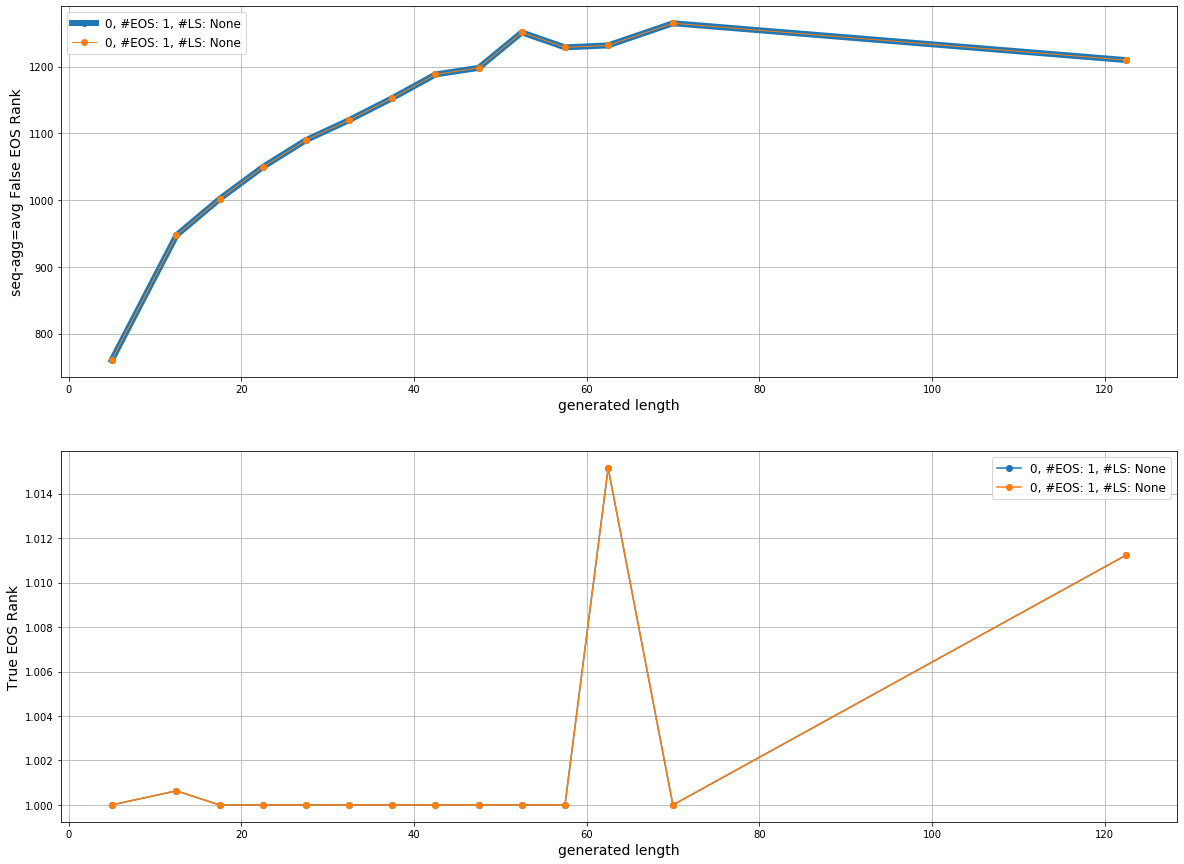

In [3]:
seq_agg = 'avg' # 'min', 'max', or 'avg'
dataset_agg = 'avg'
min_bin_samples = 50 # minimal number of samples in one bin (5% ~ 350)
min_bin_size = 5 # min length range for one bin
max_length = 250 # max length of a target sequence
mode = 'generated' # 'target' vs. 'generated'

model_ids = [
    (0, True),
    (0, False) # True for bold line, False for the ordinary one
]

%time parser.draw_ranks(model_ids=model_ids, seq_agg=seq_agg, dataset_agg=dataset_agg, min_bin_samples=min_bin_samples, min_bin_size=min_bin_size, \
                        max_length=max_length, mode=mode, metrics=[('#EOS', 'number_eos_tokens'), ('#LS', 'label_smoothing')])

### Evaluation table

In [4]:
from IPython.core.display import HTML

metrics = [ ## (metric id, column name)
    ('tb_bleu', 'BLEU'),
    ('tb_ppl', 'Perplexity'),
    ('tb_target/empty_winrate', 'Target Empty WR'),
    ('tb_generated/empty_winrate', 'Generated Empty WR'),
    ('target_false_eos_rank', 'False Target EOS rank'),
    ('target_true_eos_rank', 'True Target EOS rank'),
]

model_ids = [ ## Assing row names and order
    (0, 'Baseline'),
]

agg = 'avg'
mode = 'target'
min_bin_samples = 400
min_bin_size = 10

HTML(parser.get_criteria_table(metrics, model_ids))

### Working with multiple parsers

In [4]:
params = {
    'number_eos_tokens',
    'label_smoothing',
    'beam',
    'unnormalized',
    'conditional_entropy_weight',
    'marginal_entropy_weight',
    'weight_temperature',
    'eos_choice',
    'logits_to_criterion',
    'eos_penalty_scheduled_p',
    'eos_penalty_alpha',
    'eos_penalty_nbest',
    'eos_penalty_fullseq',
    'scheduled_sampling_decay_c',
    'scheduled_sampling_decay_k',
    'scheduled_sampling_eps'
}

lengths = [0, 5, 10, 50, 150]

pkls = {
    'wkv': ['/scratch/mae9785/nmt/pretrain_iwslt14_weighted_keyvalue_policy_wentreg/', 
            '/scratch/mae9785/nmt/pretrain_iwslt14_weighted_keyvalue_policy_wentreg/*/'],
    'wkv_finetuned': ['/scratch/mae9785/nmt/finetune_iwslt_weighted_keyvalue_eos_penalty/',
                      '/scratch/mae9785/nmt/finetune_iwslt_weighted_keyvalue_eos_penalty/*/'],
}

parsers = {}

for experiment in pkls:
    parsers[experiment] = StatsParser(pkls[experiment], params, lengths, tqdm=True, pkl_prefix='best') 

Parsing pkls:   0%|          | 0/16 [00:00<?, ?it/s]

Parsing pkls:   0%|          | 0/16 [00:00<?, ?it/s]

In [14]:
filtering_params = {
    'eos_choice': {'weighted_key_value'}, 
    'number_eos_tokens': {1, 8, 32}, 
    'beam': {100}
}


selected_models = StatsParser.filter_models(parsers, filtering_params)

In [15]:
selected_models

{'wkv': [8, 9, 10, 11, 12, 14], 'wkv_finetuned': [8, 9, 10, 11, 12, 14]}

In [25]:
table_sequence_quality = [
    ('tb_bleu', 'BLEU'),
    ('tb_target/empty_winrate', 'Target Empty WR'),
    ('tb_generated/empty_winrate', 'Generated Empty WR'),
    ('target_generated_lenratio_mean', '|T|/|G| mean'),
    ('target_generated_lenratio_median', '|T|/|G| med'),
]

params = {
    ('beam', 'beam'),
    ('EOS#', 'number_eos_tokens'),
    ('LS', 'label_smoothing'),
    ('temp', 'weight_temperature'),
    ('ME', 'marginal_entropy_weight'),
    ('CE', 'conditional_entropy_weight'),
    ('EP-P', 'eos_penalty_scheduled_p'),
    ('EP-A', 'eos_penalty_alpha'),
    ('EP-NB', 'eos_penalty_nbest'),
    ('EP-FS', 'eos_penalty_fullseq'),
    ('SSeps', 'scheduled_sampling_eps'),
    ('SSk', 'scheduled_sampling_decay_k'),
    ('SSc', 'scheduled_sampling_decay_c'),
    ('Policy', 'eos_choice'),
    ('InCrit', 'logits_to_criterion'),
}

for parser_name, parser in parsers.items():
    print(parser_name)
    display(HTML(parser.get_criteria_table(table_sequence_quality, params, selected_models[parser_name])))

wkv


InCrit,EP-P,SSeps,beam,EP-NB,SSk,ME,EOS#,EP-FS,Policy,LS,CE,SSc,temp,EP-A,BLEU,Target Empty WR,Generated Empty WR,|T|/|G| mean,|T|/|G| med
,,,,,,,,,,,,,,,,,,,
key,0.0,0.0,100,1,0.0,1.0,32,False,weighted_key_value,0.1,1.0,0.0,1.0,0.0,33.9,0.214,0.816,1.107,1.077
value,0.0,0.0,100,1,0.0,1.0,1,False,weighted_key_value,0.1,1.0,0.0,1.0,0.0,33.73,0.186,0.754,1.187,1.077
value,0.0,0.0,100,1,0.0,1.0,8,False,weighted_key_value,0.1,1.0,0.0,1.0,0.0,34.06,0.209,0.806,1.1,1.077
key,0.0,0.0,100,1,0.0,1.0,1,False,weighted_key_value,0.1,1.0,0.0,1.0,0.0,33.88,0.192,0.756,1.174,1.074
key,0.0,0.0,100,1,0.0,1.0,8,False,weighted_key_value,0.1,1.0,0.0,1.0,0.0,34.3,0.206,0.811,1.106,1.074
value,0.0,0.0,100,1,0.0,1.0,32,False,weighted_key_value,0.1,1.0,0.0,1.0,0.0,34.1,0.209,0.804,1.104,1.079


wkv_finetuned


InCrit,EP-P,SSeps,beam,EP-NB,SSk,ME,EOS#,EP-FS,Policy,LS,CE,SSc,temp,EP-A,BLEU,Target Empty WR,Generated Empty WR,|T|/|G| mean,|T|/|G| med
,,,,,,,,,,,,,,,,,,,
key,1.0,0.0,100,10,0.0,1.0,32,False,weighted_key_value,0.1,1.0,0.0,1.0,1.0,33.71,0.217,0.821,1.107,1.083
value,1.0,0.0,100,10,0.0,1.0,1,False,weighted_key_value,0.1,1.0,0.0,1.0,1.0,33.7,0.201,0.776,1.106,1.077
value,1.0,0.0,100,10,0.0,1.0,8,False,weighted_key_value,0.1,1.0,0.0,1.0,1.0,34.09,0.217,0.84,1.095,1.071
key,1.0,0.0,100,10,0.0,1.0,1,False,weighted_key_value,0.1,1.0,0.0,1.0,1.0,33.84,0.208,0.798,1.105,1.077
key,1.0,0.0,100,10,0.0,1.0,8,False,weighted_key_value,0.1,1.0,0.0,1.0,1.0,34.13,0.226,0.851,1.088,1.062
value,1.0,0.0,100,10,0.0,1.0,32,False,weighted_key_value,0.1,1.0,0.0,1.0,1.0,34.18,0.217,0.826,1.089,1.067
